In [1]:
from sklearn import preprocessing # нормалізація даних
import numpy as np 
import pandas as pd
import seaborn as sns #викиди
from math import ceil
import re
import matplotlib.pyplot as plt
import seaborn as sea
from scipy import stats
import seaborn as sns
from scipy import stats



#print(df.head())
#print(df["CLIENTNUM"].isnull())
#to_drop=["Attrition_Flag","Gender","Marital_Status"]
#df.drop(to_drop,inplace=True,axis=1)
#print(a.head())
#print(a.loc[7])
#a.get_dtype_counts()
#a.into()
#a.index()
#print(df.filter(["CLIENTNUM","Customer_Age"]))


#print(df.dropna())###видалити всі рядки з відсутніми значеннями



In [2]:
  # find and filter out missing and incorrect values
John = pd.read_csv('BankChurners.csv', na_values='Unknown')
for i in range(1, 23):
    John[John.columns[i]].fillna(John[John.columns[i]].value_counts().idxmax(), inplace=True)


In [3]:
test=pd.read_csv('BankChurners.csv') 
to_drop=[]
test.drop(to_drop,inplace=True,axis=1)
print(test.describe())
# Total_Revolving_Bal 
# Total_Ct_Chng_Q4_Q1 !!!!!!



          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

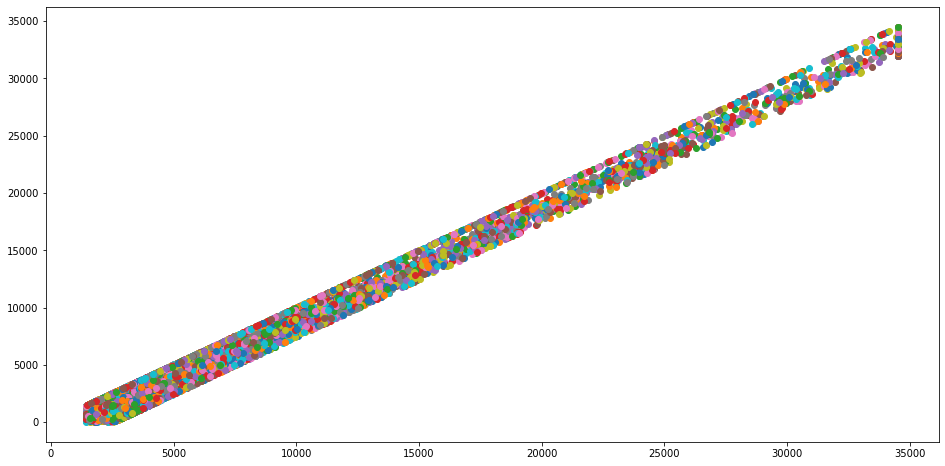

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
for row in John.values:
    ax.scatter(row[13],row[15])
plt.show ()
# не спостерігається викидів

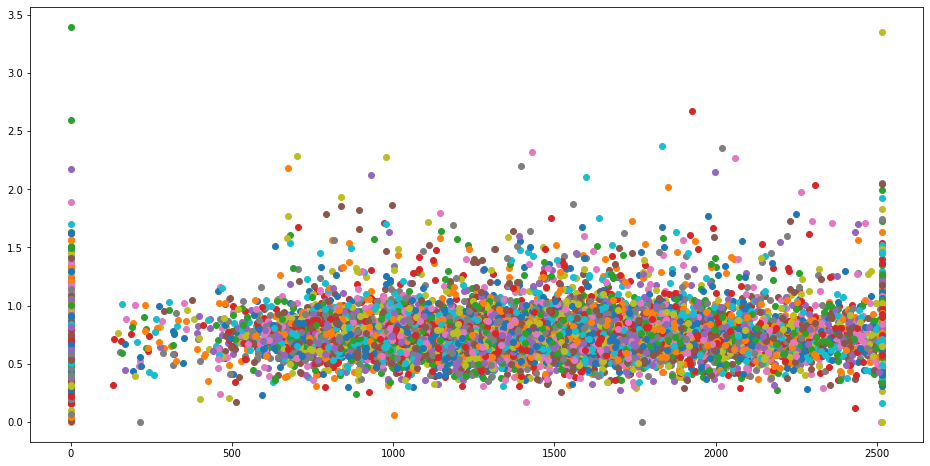

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
for row in John.values:
    ax.scatter(row[14],row[16])
plt.show ()
#елементи зверху на мою думку є викиди

In [6]:
#  unify the format, make the necessary conversions (non-numeric → numeric) if needed
some = {'Existing Customer' : 1,'Attrited Customer': 0}
person = {'M' : 1,'F' : 0}
tich = {'Uneducated' : 0,'Graduate' : 1 ,'High School' : 2,'College' : 3,'Post-Graduate' : 4,'Doctorate' : 5}
famile = {'Married' : 1, 'Single' : 0, 'Divorced' : 2}
cart = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}

In [7]:
for i,j in enumerate(John['Gender']):
    John.at[i, 'Gender'] = person[j] 
    
for i,a in enumerate(John['Marital_Status']):
    John.at[i, 'Marital_Status'] = famile[a]     

for i,j in enumerate(John['Education_Level']):
    John.at[i, 'Education_Level'] = tich[j]

for i,j in enumerate(John['Income_Category']):
    number_list = re.findall(r"\d+",j)
    John.at[i, 'Income_Category'] = int(max(number_list))*1000 
    
for i,j in enumerate(John['Card_Category']):
    John.at[i, 'Card_Category'] = cart[j]
    
for i,a in enumerate(John['Attrition_Flag']):
    John.at[i, 'Attrition_Flag'] = some[a]

for i in list (John.columns):
    pandas.to_numeric(John[i],downcast='integer',errors ='coerce')

In [8]:
# discover outliers and find a way to deal with them
for a in list (John.columns):
    try:
        John=John[(np.abs(stats.zscore(John[a],axis = 0))< 3)]
    except AttributeError:
        pass
    except TypeError:
        pass
print(John.shape)

(9317, 23)


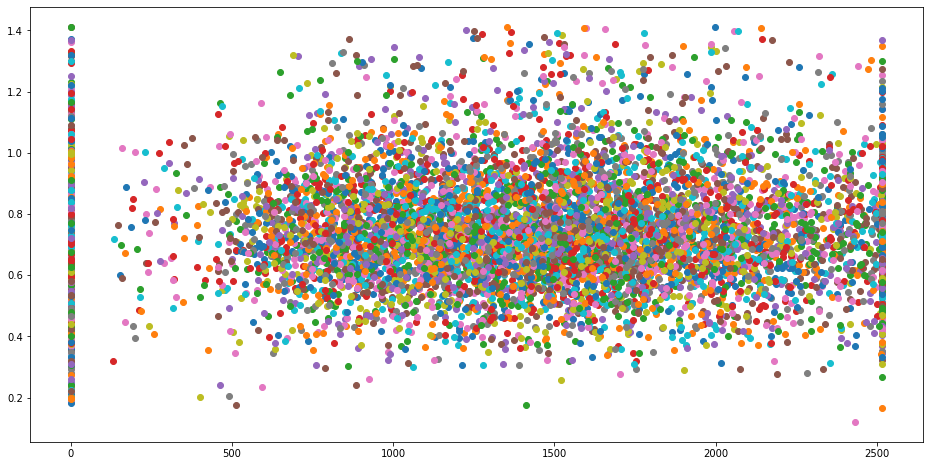

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
for row in John.values:
    ax.scatter(row[14],row[16])
plt.show ()